# 6.3 Geographical Visualizations with Python

## The script below contains the following:
### 1. Import libraries and data
### 2. Data Cleaning 
### 3. Plotting a choropleth

### Import libraries and data

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import json

In [2]:
%matplotlib inline

In [3]:
# Creating the path variable

path = os.getcwd()[0:os.getcwd().find('03 Scripts')]

In [4]:
# Checking the path variable

path

'C:\\Users\\babum\\Desktop\\CF_Data Analytics\\Data Immersion\\Achievement 6\\04-2023 US Educational Finance Analysis\\'

In [5]:
# Importing state dataframe

df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'states_clean.pkl'))

In [6]:
# Import ".json" file for the U.S. 

country_geo = os.path.join(path, '02 Data', 'Prepared Data', 'us-states.json')

In [7]:
# Checking the contents of the JSON file:

f = open(country_geo,)
  
# returns JSON object asa dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'id': 'AL', 'properties': {'name': 'Alabama'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-87.359296, 35.00118], [-85.606675, 34.984749], [-85.431413, 34.124869], [-85.184951, 32.859696], [-85.069935, 32.580372], [-84.960397, 32.421541], [-85.004212, 32.322956], [-84.889196, 32.262709], [-85.058981, 32.13674], [-85.053504, 32.01077], [-85.141136, 31.840985], [-85.042551, 31.539753], [-85.113751, 31.27686], [-85.004212, 31.003013], [-85.497137, 30.997536], [-87.600282, 30.997536], [-87.633143, 30.86609], [-87.408589, 30.674397], [-87.446927, 30.510088], [-87.37025, 30.427934], [-87.518128, 30.280057], [-87.655051, 30.247195], [-87.90699, 30.411504], [-87.934375, 30.657966], [-88.011052, 30.685351], [-88.10416, 30.499135], [-88.137022, 30.318396], [-88.394438, 30.367688], [-88.471115, 31.895754], [-88.241084, 33.796253], [-88.098683, 34.891641], [-88.202745, 34.995703], [-87.359296, 35.00118]]]}}
{'type': 'Feature', 'id': 'AK', 'properties': {'name': 'Alaska'},

In [8]:
# Check the dimension of state dataframe

df.head()

,state,year,enroll,total_rev,fed_rev,st_rev,loc_rev,total_exp,instruction_exp,service_exp,other_exp,capital_exp
51,Alabama,1993,727716.0,2827391,331409,1729295,766687,2833433,1564558,794146,237222.0,204207
52,Alaska,1993,121156.0,1191398,176150,775829,239419,1126398,494917,433788,36291.0,135791
53,Arizona,1993,676297.0,3427976,318465,1415407,1694104,3623946,1578889,1000914,164083.0,680139
54,Arkansas,1993,311432.0,1346909,128196,771079,447634,1376067,782791,386526,68617.0,97824
55,California,1993,5129788.0,28043338,2151157,17064146,8828035,28110986,15281147,8914559,1608514.0,1944760


In [9]:
df.shape

(1224, 12)

In [10]:
df.describe()

,year,enroll,total_rev,fed_rev,st_rev,loc_rev,total_exp,instruction_exp,service_exp,other_exp,capital_exp
count,1224.000000,1.224000e+03,1.224000e+03,1.224000e+03,1.224000e+03,1.224000e+03,1.224000e+03,1.224000e+03,1.224000e+03,1.224000e+03,1.224000e+03
mean,2004.500000,9.175416e+05,9.290765e+06,7.873945e+05,4.312719e+06,4.190651e+06,9.395936e+06,4.864428e+06,2.737271e+06,4.299509e+05,9.242366e+05
std,6.925016,1.066514e+06,1.191733e+07,1.164312e+06,5.620372e+06,5.564716e+06,1.215400e+07,6.385360e+06,3.399931e+06,5.347893e+05,1.349417e+06
min,1993.000000,4.386600e+04,4.656500e+05,3.367200e+04,0.000000e+00,2.391700e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,1.270800e+04
25%,1998.750000,2.645145e+05,2.224650e+06,1.931018e+05,1.191590e+06,7.380178e+05,2.211494e+06,1.195616e+06,6.527800e+05,1.034492e+05,1.886915e+05
50%,2004.500000,6.499335e+05,5.256748e+06,4.219105e+05,2.614030e+06,2.098524e+06,5.415694e+06,2.737071e+06,1.567025e+06,2.717040e+05,5.295925e+05
75%,2010.250000,1.010532e+06,1.110987e+07,8.479270e+05,5.224320e+06,4.793464e+06,1.089286e+07,5.648436e+06,3.308660e+06,5.172222e+05,9.908930e+05
max,2016.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,1.022366e+07


### Data cleaning

In [11]:
# Check the null values in the state datafrane

df.isnull().sum()

state              0
year               0
enroll             0
total_rev          0
fed_rev            0
st_rev             0
loc_rev            0
total_exp          0
instruction_exp    0
service_exp        0
other_exp          0
capital_exp        0
dtype: int64

In [12]:
# Check for duplicate values

dups_df = df.duplicated()

In [13]:
# Check the results

dups_df.shape

(1224,)

### 1. df, dist dataframe - no null values and no duplicates
### 2. state dataframe - null values are treated with the mean value and no duplicates.

## Check for extreme values in states dataframe

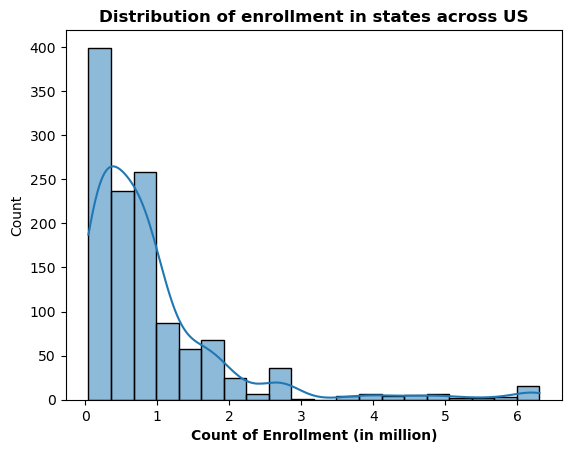

In [14]:
# Checking for extreme values for enroll
f = df['enroll']/1000000;
g = sns.histplot(f, bins=20, kde = True) 
plt.title('Distribution of enrollment in states across US', fontweight = 'bold');
plt.xlabel('Count of Enrollment (in million)', fontweight = 'bold');
plt.ticklabel_format(axis = 'x', style = '', scilimits = (0,10));

In [15]:
df[df['enroll'] > 3000000]

,state,year,enroll,total_rev,fed_rev,st_rev,loc_rev,total_exp,instruction_exp,service_exp,other_exp,capital_exp
55,California,1993,5129788.0,28043338,2151157,17064146,8828035,28110986,15281147,8914559,1608514.0,1944760
94,Texas,1993,3535333.0,20267205,1233446,9919561,9114198,18574871,8914245,5150373,971683.0,2989512
106,California,1994,4120498.0,23440845,2095878,13175550,8169417,23012688,12443864,6754346,1615630.0,1916061
145,Texas,1994,3601627.0,19713604,1456330,8569649,9687625,19224149,9814470,6093204,936331.0,1717181
157,California,1995,5299405.0,29512214,2612241,15541486,11358487,30097549,16146416,8603751,2181053.0,2669270
196,Texas,1995,3670007.0,20483376,1496378,8718907,10268091,20198924,10652067,5778548,1087321.0,2104954
208,California,1996,5460484.0,31282981,2603882,17061474,11617625,31561692,16880730,9222569,2362407.0,2580639
247,Texas,1996,3740260.0,22241369,1613462,9834742,10793165,22401797,11427564,6131290,1174475.0,2667181
259,California,1997,5595836.0,35614934,2850766,20560730,12203438,33862281,18160435,10040400,1792979.0,3088674
298,Texas,1997,3826366.0,23091567,1688975,9878849,11523743,23671010,12038459,6338637,1153593.0,3147085


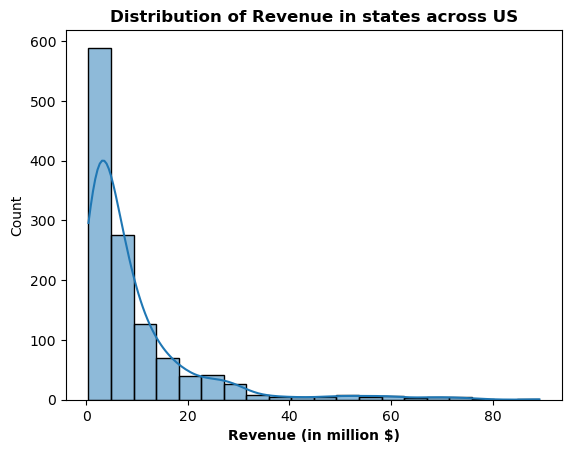

In [16]:
# Checking for extreme values for total revenue
f1 = df['total_rev']/1000000
g1 = sns.histplot(f1, bins=20, kde = True) 
plt.title('Distribution of Revenue in states across US', fontweight = 'bold');
plt.xlabel('Revenue (in million $)', fontweight = 'bold');
plt.ticklabel_format(axis = 'x', style = '', scilimits = (0,10));

In [17]:
df[df['total_rev'] > 25000000]

,state,year,enroll,total_rev,fed_rev,st_rev,loc_rev,total_exp,instruction_exp,service_exp,other_exp,capital_exp
55,California,1993,5129788.0,28043338,2151157,17064146,8828035,28110986,15281147,8914559,1608514.0,1944760
157,California,1995,5299405.0,29512214,2612241,15541486,11358487,30097549,16146416,8603751,2181053.0,2669270
185,New York,1995,2738361.0,25063999,1368074,9932669,13763256,26540967,15693535,6970608,945437.0,1811288
208,California,1996,5460484.0,31282981,2603882,17061474,11617625,31561692,16880730,9222569,2362407.0,2580639
236,New York,1996,2788343.0,26026366,1510447,10284155,14231764,26974514,15973623,6953428,942356.0,1835923
...,...,...,...,...,...,...,...,...,...,...,...,...
1237,Illinois,2016,2030717.0,32908958,2331724,12053316,18523918,33037244,17804976,10426170,992684.0,2015647
1254,New Jersey,2016,1364473.0,30012666,1187430,11681799,17143437,29665476,15831343,9549742,1375737.0,1414861
1256,New York,2016,2590945.0,66912661,3369803,27437593,36105265,68282026,43964520,15883500,1599317.0,4656189
1262,Pennsylvania,2016,1572593.0,31077289,1904293,11181046,17991950,30925177,16717308,8464573,1079198.0,1793713


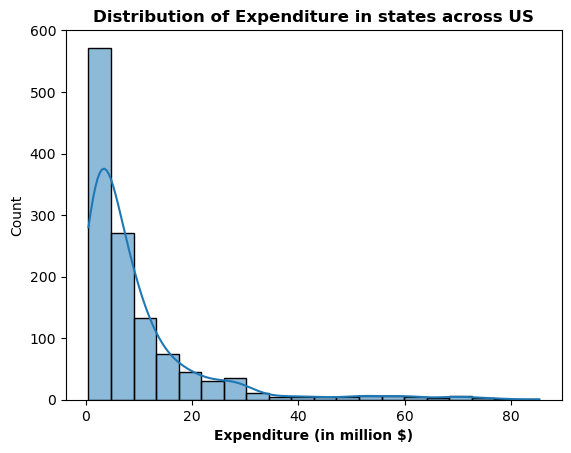

In [18]:
# Checking for extreme values for total expenditure

f2 = df['total_exp']/1000000
g2 = sns.histplot(f2, bins=20, kde = True) 
plt.title('Distribution of Expenditure in states across US', fontweight = 'bold');
plt.xlabel('Expenditure (in million $)', fontweight = 'bold');
plt.ticklabel_format(axis = 'x', style = '', scilimits = (0,10));

In [19]:
df[df['total_exp'] > 25000000]

,state,year,enroll,total_rev,fed_rev,st_rev,loc_rev,total_exp,instruction_exp,service_exp,other_exp,capital_exp
55,California,1993,5129788.0,28043338,2151157,17064146,8828035,28110986,15281147,8914559,1608514.0,1944760
134,New York,1994,2702937.0,23933662,1442038,9092275,13399349,25359726,14829280,6782725,992378.0,1717307
157,California,1995,5299405.0,29512214,2612241,15541486,11358487,30097549,16146416,8603751,2181053.0,2669270
185,New York,1995,2738361.0,25063999,1368074,9932669,13763256,26540967,15693535,6970608,945437.0,1811288
208,California,1996,5460484.0,31282981,2603882,17061474,11617625,31561692,16880730,9222569,2362407.0,2580639
...,...,...,...,...,...,...,...,...,...,...,...,...
1237,Illinois,2016,2030717.0,32908958,2331724,12053316,18523918,33037244,17804976,10426170,992684.0,2015647
1254,New Jersey,2016,1364473.0,30012666,1187430,11681799,17143437,29665476,15831343,9549742,1375737.0,1414861
1256,New York,2016,2590945.0,66912661,3369803,27437593,36105265,68282026,43964520,15883500,1599317.0,4656189
1262,Pennsylvania,2016,1572593.0,31077289,1904293,11181046,17991950,30925177,16717308,8464573,1079198.0,1793713


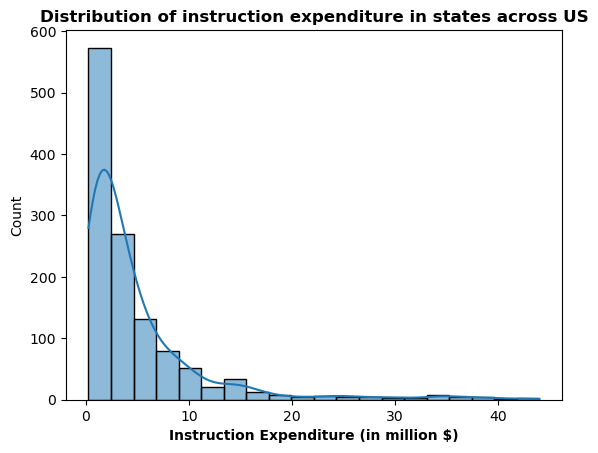

In [20]:
# Checking for extreme values for instruction expenditure
f3 = df['instruction_exp']/1000000;
g3 = sns.histplot(f3, bins=20, kde = True) 
plt.title('Distribution of instruction expenditure in states across US', fontweight = 'bold');
plt.xlabel('Instruction Expenditure (in million $)', fontweight = 'bold');
plt.ticklabel_format(axis = 'x', style = '', scilimits = (0,10));

In [21]:
# Subsetting the dataframe with states that have high enroll, revenue and expenditure to check on the trend

st = df.loc[df['state'].isin (['California', 'New York','Texas', 'Pennsylvania','Illinois'])]

In [22]:
st

,state,year,enroll,total_rev,fed_rev,st_rev,loc_rev,total_exp,instruction_exp,service_exp,other_exp,capital_exp
55,California,1993,5129788.0,28043338,2151157,17064146,8828035,28110986,15281147,8914559,1608514.0,1944760
64,Illinois,1993,1856841.0,10584624,632724,3467071,6484829,10744695,5520683,3352722,426411.0,852085
83,New York,1993,2663637.0,22688753,1276362,8848470,12563921,23934282,14029639,6425626,935895.0,1625848
89,Pennsylvania,1993,1719829.0,12269422,695807,4781408,6792207,12809067,6856146,3622113,684867.0,966827
94,Texas,1993,3535333.0,20267205,1233446,9919561,9114198,18574871,8914245,5150373,971683.0,2989512
...,...,...,...,...,...,...,...,...,...,...,...,...
1228,California,2016,6217031.0,89217262,7709079,50904567,30603616,85320133,42587272,26058021,3995951.0,6786142
1237,Illinois,2016,2030717.0,32908958,2331724,12053316,18523918,33037244,17804976,10426170,992684.0,2015647
1256,New York,2016,2590945.0,66912661,3369803,27437593,36105265,68282026,43964520,15883500,1599317.0,4656189
1262,Pennsylvania,2016,1572593.0,31077289,1904293,11181046,17991950,30925177,16717308,8464573,1079198.0,1793713


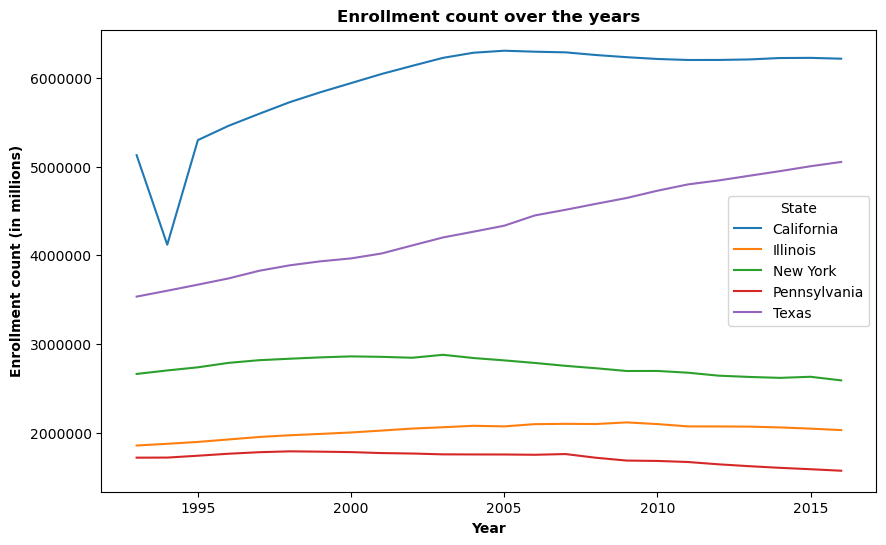

In [23]:
# Creating line chart to view enrollment on selected states
plt.figure(figsize = (10,6))
Enroll = sns.lineplot(x = 'year', y = 'enroll', hue = 'state', data = st, ci = False)
plt.title('Enrollment count over the years', fontweight = 'bold');
plt.xlabel('Year', fontweight = 'bold');
plt.ylabel ('Enrollment count (in millions)', fontweight = 'bold');
plt.ticklabel_format(axis = 'y', style = '', scilimits = (0,10));
plt.legend(title = 'State');

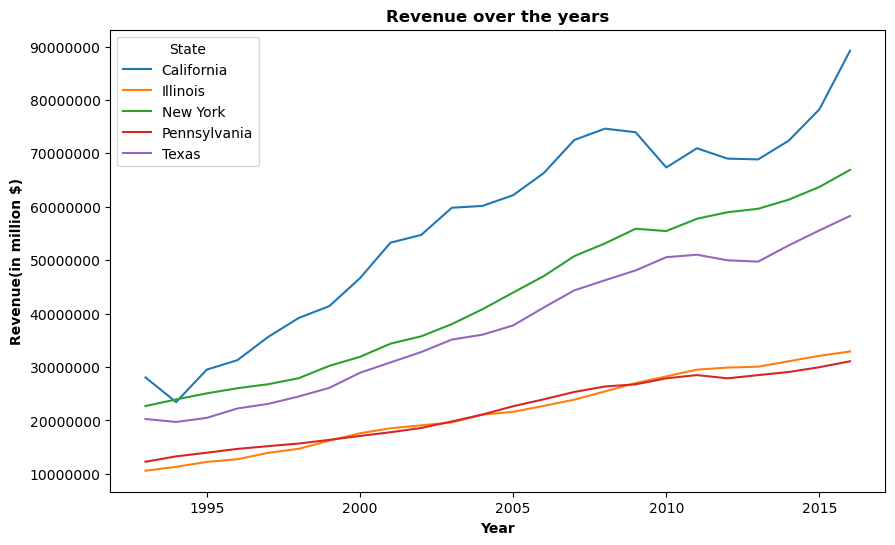

In [24]:
# Creating line chart to view revenue on selected states
plt.figure(figsize = (10,6))
Revenue = sns.lineplot(x = 'year', y = 'total_rev', hue = 'state', data = st, ci = False)
plt.title('Revenue over the years', fontweight = 'bold');
plt.xlabel('Year', fontweight = 'bold');
plt.ylabel ('Revenue(in million $)', fontweight = 'bold');
plt.ticklabel_format(axis = 'y', style = '', scilimits = (0,10));
plt.legend(title = 'State');

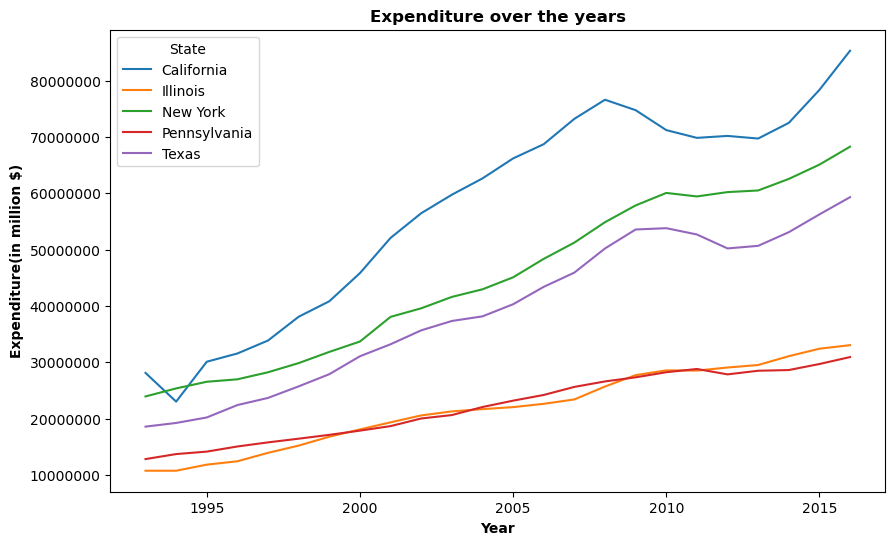

In [25]:
# Creating line chart to view expenditure on selected states
plt.figure(figsize = (10,6))
Total_exp = sns.lineplot(x = 'year', y = 'total_exp', hue = 'state', data = st, ci = False)
plt.title('Expenditure over the years', fontweight = 'bold');
plt.xlabel('Year', fontweight = 'bold');
plt.ylabel ('Expenditure(in million $)', fontweight = 'bold');
plt.ticklabel_format(axis = 'y', style = '', scilimits = (0,10));
plt.legend(title = 'State');

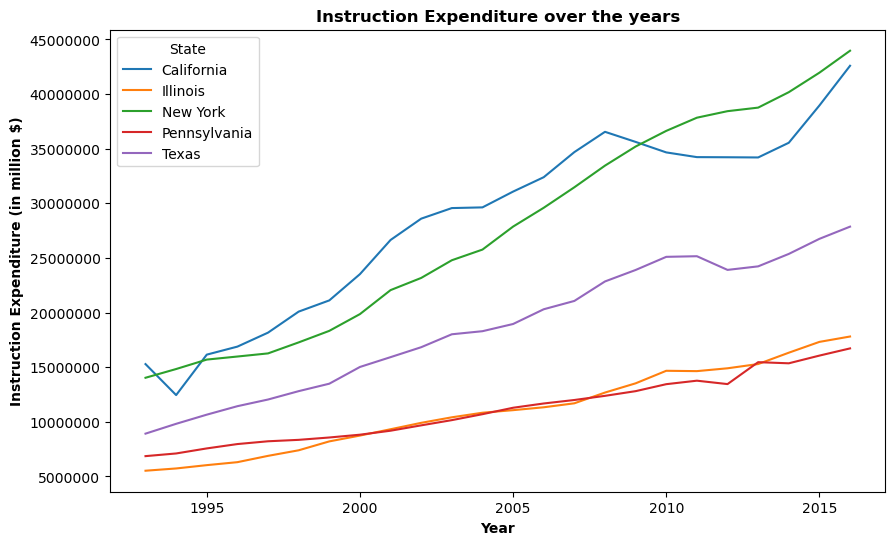

In [26]:
# Creating line chart to view instruction expenditure on selected states
plt.figure(figsize = (10,6))
Ins_exp = sns.lineplot(x = 'year', y = 'instruction_exp', hue = 'state', data = st, ci = False)
plt.title('Instruction Expenditure over the years', fontweight = 'bold');
plt.xlabel('Year', fontweight = 'bold');
plt.ylabel ('Instruction Expenditure (in million $)', fontweight = 'bold');
plt.ticklabel_format(axis = 'y', style = '', scilimits = (0,10));
plt.legend(title = 'State');

### The histogram is right skewed. There were few states that had high enrollment, revenue and expenses. The line chart shows that the trend in increase in these values in these states has been gradual. So these values are not treated as outliers and no action is taken to treat these values.

## Plotting a choropleth

In [27]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = (3))

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
Total_rev = folium.Choropleth(
    geo_data = country_geo, 
    data = df,
    columns = ['state', 'total_rev'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Revenue (in million $)").add_to(map)

# add labels indicating the name of the community
style_function = "font-size: 15px; font-weight: bold"
Total_rev.geojson.add_child( 
    folium.features.GeoJsonTooltip(['name'], style=style_function, labels=True))

folium.LayerControl().add_to(map)

map

### States those receive high funding are California, Texas, New York, Illinois, Pennsylvania. 

In [28]:
map.save('Revenue.html')

In [29]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = (3))

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
Enroll = folium.Choropleth(
    geo_data = country_geo, 
    data = df,
    columns = ['state', 'enroll'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Enrollment Count").add_to(map)

# add labels indicating the name of the community
style_function = "font-size: 15px; font-weight: bold"
Enroll.geojson.add_child( 
    folium.features.GeoJsonTooltip(['name'], style=style_function, labels=True))

folium.LayerControl().add_to(map)

map

### States with high enrollment count are California, Texas, Florida, New York.

In [30]:
map.save('Enroll.html')

In [31]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = (3))

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
Total_exp = folium.Choropleth(
    geo_data = country_geo, 
    data = df,
    columns = ['state', 'total_exp'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Expenditure (in million $)").add_to(map)

# add labels indicating the name of the community
style_function = "font-size: 15px; font-weight: bold"
Total_exp.geojson.add_child( 
    folium.features.GeoJsonTooltip(['name'], style=style_function, labels=True))

folium.LayerControl().add_to(map)

map

### States with high expenditure are California, Texas, NewYork, Illinois, Pennsylvania.

In [32]:
map.save('Expenditure.html')

In [33]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = (3))

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
Total_ins_exp = folium.Choropleth(
    geo_data = country_geo, 
    data = df,
    columns = ['state', 'instruction_exp'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Instruction Expenditure (in million $)").add_to(map)

# add labels indicating the name of the community
style_function = "font-size: 15px; font-weight: bold"
Total_ins_exp.geojson.add_child( 
    folium.features.GeoJsonTooltip(['name'], style=style_function, labels=True))

folium.LayerControl().add_to(map)

map

### States that spend more on Instruction expenses are California, Texas, New York, Florida, Pennsylvania, Illinois, New Jersey. 

In [34]:
map.save('Instruction_expenditure.html')

### The states that are high in income and expenditure are the states with high population and big states. So for further analysis new column showing the per student revenue and expense will be created.

## Deriving new column for futher analysis

In [35]:
# Deriving a new column to find the per student revenue for each state

df['rev_per_student'] = df['total_rev']/df['enroll']

In [36]:
# Deriving a new column to find the per student expenditure for each state state

df['exp_per_student'] = df['total_exp']/df['enroll']

In [37]:
# Deriving a new column to find the per student instruction expenditure for each state

df['ins_exp_per_student'] = df['instruction_exp']/df['enroll']

In [38]:
df.head()

,state,year,enroll,total_rev,fed_rev,st_rev,loc_rev,total_exp,instruction_exp,service_exp,other_exp,capital_exp,rev_per_student,exp_per_student,ins_exp_per_student
51,Alabama,1993,727716.0,2827391,331409,1729295,766687,2833433,1564558,794146,237222.0,204207,3.885295,3.893597,2.149957
52,Alaska,1993,121156.0,1191398,176150,775829,239419,1126398,494917,433788,36291.0,135791,9.833586,9.297088,4.084957
53,Arizona,1993,676297.0,3427976,318465,1415407,1694104,3623946,1578889,1000914,164083.0,680139,5.068743,5.358513,2.334609
54,Arkansas,1993,311432.0,1346909,128196,771079,447634,1376067,782791,386526,68617.0,97824,4.324890,4.418515,2.513521
55,California,1993,5129788.0,28043338,2151157,17064146,8828035,28110986,15281147,8914559,1608514.0,1944760,5.466764,5.479951,2.978904


In [39]:
df.isnull().sum()

state                  0
year                   0
enroll                 0
total_rev              0
fed_rev                0
st_rev                 0
loc_rev                0
total_exp              0
instruction_exp        0
service_exp            0
other_exp              0
capital_exp            0
rev_per_student        0
exp_per_student        0
ins_exp_per_student    0
dtype: int64

## Plotting a choropleth for the new variable

In [40]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = (3))

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
Rev_st = folium.Choropleth(
    geo_data = country_geo, 
    data = df,
    columns = ['state', 'rev_per_student'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Revenue Per Student ($)").add_to(map)

# add labels indicating the name of the community
style_function = "font-size: 15px; font-weight: bold"
Rev_st.geojson.add_child( 
    folium.features.GeoJsonTooltip(['name'], style=style_function, labels=True))

folium.LayerControl().add_to(map)

map

### The states that receives more funding per student are New York, Wyoming, Alaska, New Jersey, Connecticut, Vermont.

In [41]:
map.save('Revenue_per_student.html')

In [42]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = (3))

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
Exp_st = folium.Choropleth(
    geo_data = country_geo, 
    data = df,
    columns = ['state', 'exp_per_student'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Expenditure per student ($)").add_to(map)


# add labels indicating the name of the community
style_function = "font-size: 15px; font-weight: bold"
Exp_st.geojson.add_child( 
    folium.features.GeoJsonTooltip(['name'], style=style_function, labels=True))

folium.LayerControl().add_to(map)

map

### The states that spend more per student are New York, Wyoming, North Dakota, Alaska, New Jersey, Connecticut, Vermont.

In [43]:
map.save('Expenditure_per_student.html')

In [44]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100,0], zoom_start = (3))
# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
Ins_exp_st = folium.Choropleth(
                geo_data = country_geo, 
                data = df,
                columns = ['state', 'ins_exp_per_student'],
                key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
                fill_color = 'YlOrRd', fill_opacity=0.6, line_opacity=0.1,
                legend_name = "Instruction expenditure per student ($)").add_to(map)

# add labels indicating the name of the community
style_function = "font-size: 15px; font-weight: bold"
Ins_exp_st.geojson.add_child( 
    folium.features.GeoJsonTooltip(['name'], style=style_function, labels=True))

folium.LayerControl().add_to(map)  

map

### The states that spend more on instruction expenses per student are New York, Alaska, Wyoming, Illinois, Pennsylvania, New Jersey, Connecticut, Vermont, Massachusetts

In [45]:
map.save('Instruction_exp_student.html')

### There are few states , for example Texas, that receive funding and spend the same but the chart above shows that the spending on insruction is less for those states. Then where do these states spend their most revenue on?
### Would like to know how each school disrtict differ within the state in all these categories.

## Export dataframe

In [46]:
df.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'states_derived.pkl'))